In [ ]:
##Import Libraries. 

In [19]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
## load dataset

In [2]:
dataset = pd.read_csv("Malware_dataset.csv")

In [ ]:
## Dataset Exploration
## Data analysis before training - outlined in research design 

In [3]:
dataset.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [4]:
dataset.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [ ]:
## statistical analysis of the data 

In [5]:
dataset.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [8]:
dataset["Class"] = dataset['Class'].replace(['Malware', 'Benign'], [1, 0]) 

In [9]:
dataset.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,0
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,0
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,0
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,0
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,0


In [12]:
data = dataset.drop(['Category'], axis =1)

In [13]:
corelation = data.corr()

In [14]:
corelation

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
pslist.nproc,1.000000,0.485450,-0.208960,NaN,-0.004850,0.567111,-0.006901,0.207611,0.021915,NaN,...,0.079452,-0.003133,0.027375,0.221725,NaN,0.431282,-0.053061,-0.030426,0.008045,-0.198375
pslist.nppid,0.485450,1.000000,-0.726761,NaN,-0.224777,-0.094653,-0.594012,-0.093094,-0.160602,NaN,...,-0.111617,-0.016397,-0.652891,-0.244422,NaN,0.005160,-0.239525,-0.010932,0.002349,0.429412
pslist.avg_threads,-0.208960,-0.726761,1.000000,NaN,0.332666,0.556844,0.904915,0.281238,0.242195,NaN,...,0.225709,0.026714,0.804723,0.522784,NaN,0.347861,0.298627,-0.007511,0.009647,-0.790666
pslist.nprocs64bit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pslist.avg_handlers,-0.004850,-0.224777,0.332666,NaN,1.000000,0.275566,0.360883,0.971557,0.992540,NaN,...,0.105178,0.010450,0.317883,0.250562,NaN,0.204127,0.069981,-0.010605,0.007308,-0.334098
dlllist.ndlls,0.567111,-0.094653,0.556844,NaN,0.275566,1.000000,0.778771,0.427131,0.211031,NaN,...,0.299932,0.045204,0.645479,0.681809,NaN,0.752189,0.198395,-0.040057,0.026202,-0.823933
dlllist.avg_dlls_per_proc,-0.006901,-0.594012,0.904915,NaN,0.360883,0.778771,1.000000,0.365824,0.264175,NaN,...,0.309271,0.049770,0.861711,0.689500,NaN,0.572227,0.307340,-0.025459,0.022666,-0.908555
handles.nhandles,0.207611,-0.093094,0.281238,NaN,0.971557,0.427131,0.365824,1.000000,0.967002,NaN,...,0.128301,0.012881,0.310691,0.307211,NaN,0.321916,0.056964,-0.018165,0.009566,-0.382270
handles.avg_handles_per_proc,0.021915,-0.160602,0.242195,NaN,0.992540,0.211031,0.264175,0.967002,1.000000,NaN,...,0.074514,0.002843,0.237993,0.187618,NaN,0.155814,0.037261,-0.008355,0.003216,-0.254925
handles.nport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(corelation["Class"].sort_values())

dlllist.avg_dlls_per_proc                -0.908555
handles.nevent                           -0.876770
handles.nthread                          -0.872531
handles.nmutant                          -0.855148
dlllist.ndlls                            -0.823933
handles.nsection                         -0.820967
pslist.avg_threads                       -0.790666
ldrmodules.not_in_load                   -0.787472
ldrmodules.not_in_mem                    -0.787413
handles.ntimer                           -0.783137
handles.nsemaphore                       -0.769097
svcscan.process_services                 -0.763656
ldrmodules.not_in_init                   -0.716578
svcscan.shared_process_services          -0.710979
handles.nkey                             -0.698239
svcscan.nactive                          -0.653268
svcscan.nservices                        -0.631078
handles.ndesktop                         -0.392919
handles.nhandles                         -0.382270
ldrmodules.not_in_load_avg     

In [ ]:
## dropping columns with no correlation with class. 
## indicates low likelihood of affecting the class determination. 

In [45]:
ds = data.drop(['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services'], axis=1)

In [46]:
corr_cleaned = ds.corr()

In [47]:
print(corr_cleaned["Class"].sort_values())

dlllist.avg_dlls_per_proc                -0.908555
handles.nevent                           -0.876770
handles.nthread                          -0.872531
handles.nmutant                          -0.855148
dlllist.ndlls                            -0.823933
handles.nsection                         -0.820967
pslist.avg_threads                       -0.790666
ldrmodules.not_in_load                   -0.787472
ldrmodules.not_in_mem                    -0.787413
handles.ntimer                           -0.783137
handles.nsemaphore                       -0.769097
svcscan.process_services                 -0.763656
ldrmodules.not_in_init                   -0.716578
svcscan.shared_process_services          -0.710979
handles.nkey                             -0.698239
svcscan.nactive                          -0.653268
svcscan.nservices                        -0.631078
handles.ndesktop                         -0.392919
handles.nhandles                         -0.382270
ldrmodules.not_in_load_avg     

In [ ]:
## heatmap of the correlated values
## Provides a visual understanding of how features are correlated with each other and the class value. 
## darker = more corelation. 

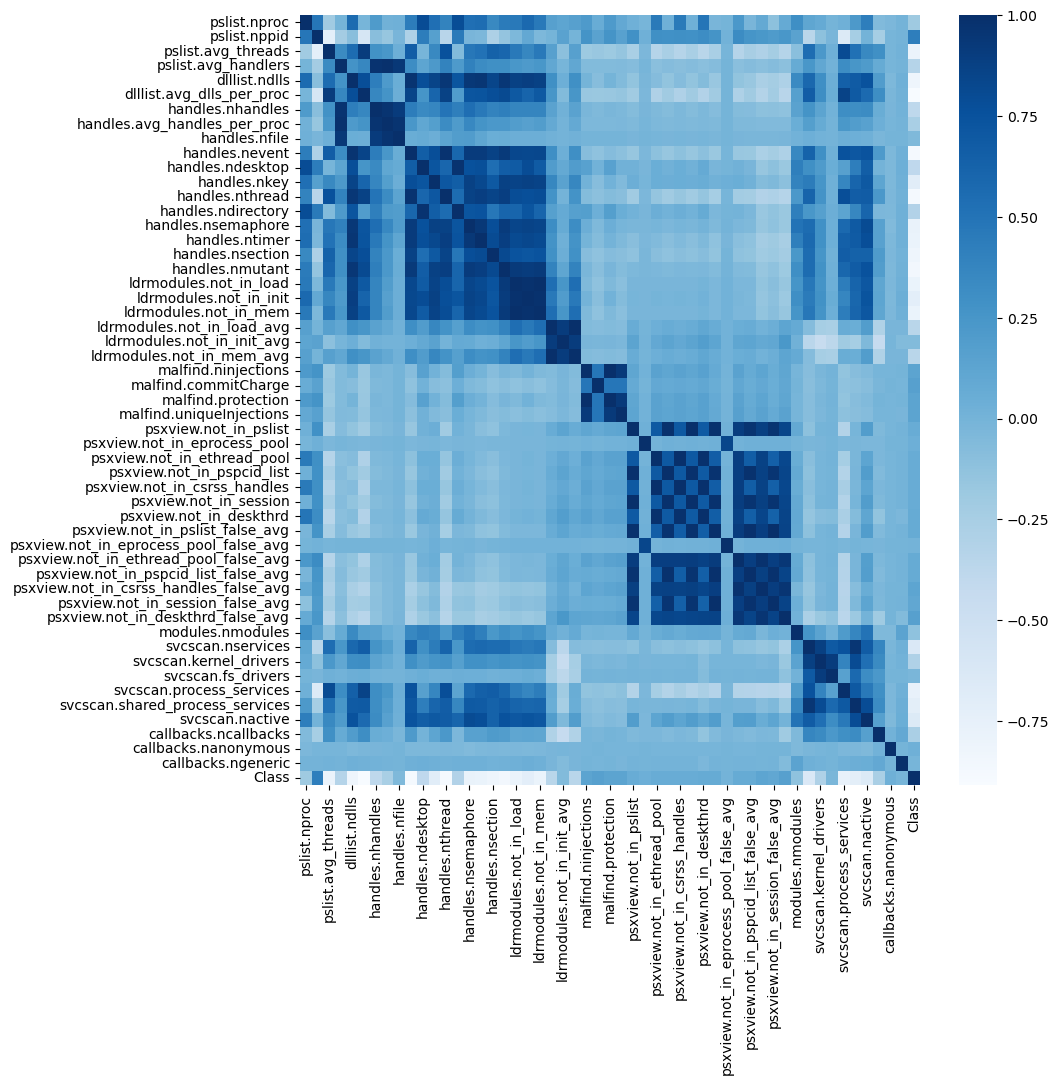

In [49]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_cleaned, cmap='Blues')
plt.show()

In [ ]:
## look at scatter plots with top 10 features against label. 
psxview.not_in_ethread_pool_false_avg     0.072665
psxview.not_in_deskthrd                   0.075321
psxview.not_in_session_false_avg          0.098802
psxview.not_in_csrss_handles_false_avg    0.123306
malfind.protection                        0.131069
malfind.ninjections                       0.133450
malfind.uniqueInjections                  0.134043
malfind.commitCharge                      0.158721
psxview.not_in_deskthrd_false_avg         0.162048
pslist.nppid                              0.429412

In [64]:
barplot_data = pd.DataFrame()

In [68]:
barplot_data = ds[['pslist.nppid', 'psxview.not_in_deskthrd_false_avg', 'malfind.commitCharge', 'malfind.uniqueInjections', 'malfind.ninjections',
                 'malfind.protection', 'psxview.not_in_csrss_handles_false_avg', 'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd',
                 'psxview.not_in_ethread_pool_false_avg', 'Class']]

In [69]:
barplot_data.head()

,pslist.nppid,psxview.not_in_deskthrd_false_avg,malfind.commitCharge,malfind.uniqueInjections,malfind.ninjections,malfind.protection,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,Class
0,17,0.191489,21,1.250000,5,30,0.148936,0.085106,9,0.063830,0
1,19,0.127660,77,1.714286,12,72,0.085106,0.042553,6,0.000000,0
2,14,0.125000,6,1.250000,5,30,0.100000,0.050000,5,0.000000,0
3,13,0.187500,2,1.000000,2,12,0.125000,0.062500,6,0.000000,0
4,16,0.217391,77,2.000000,12,72,0.173913,0.130435,10,0.086957,0


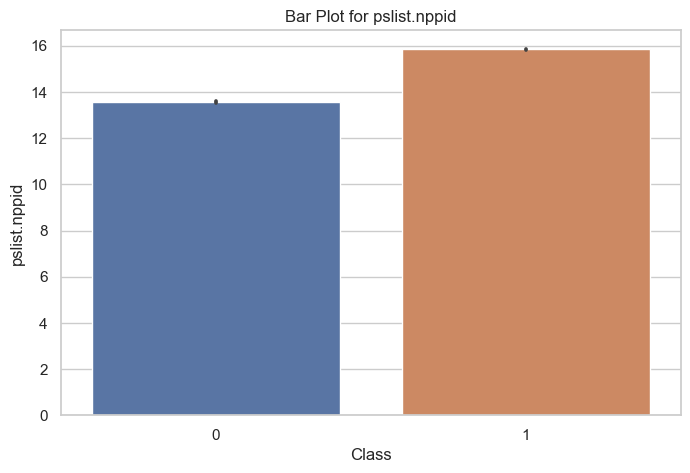

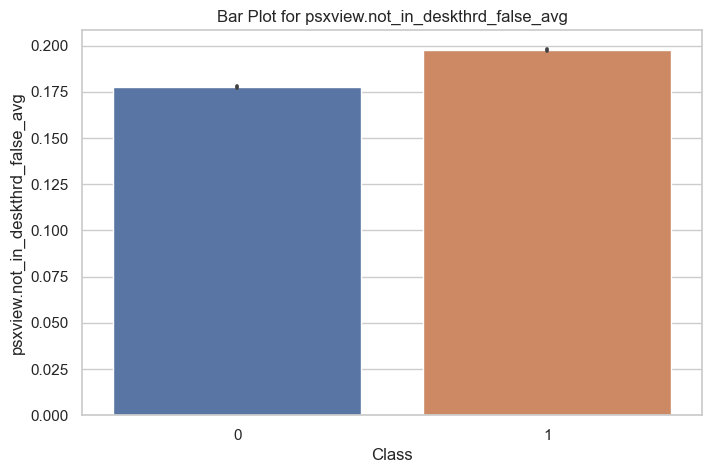

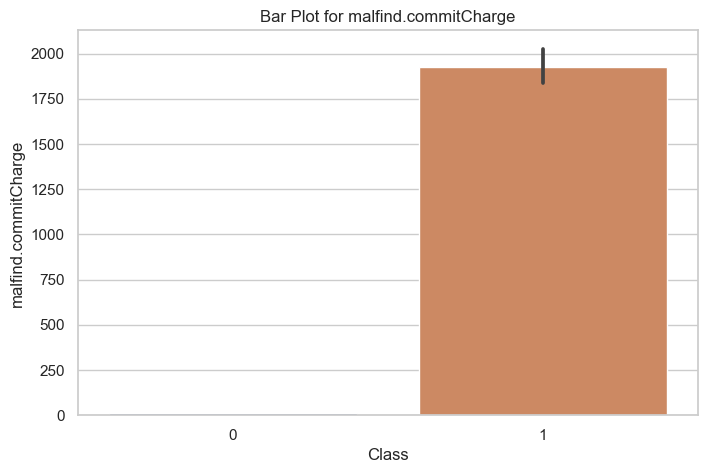

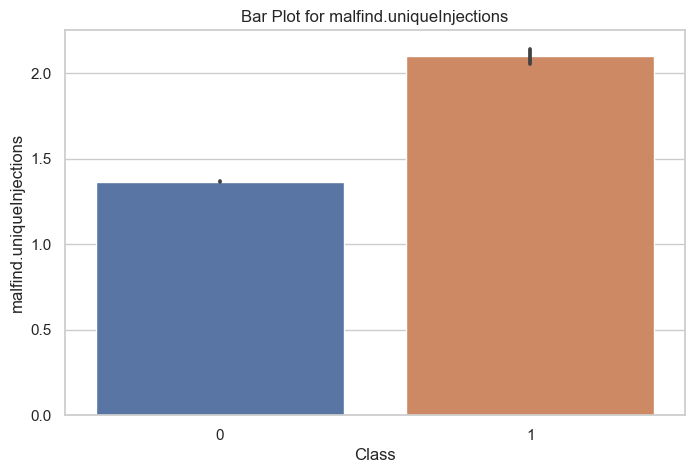

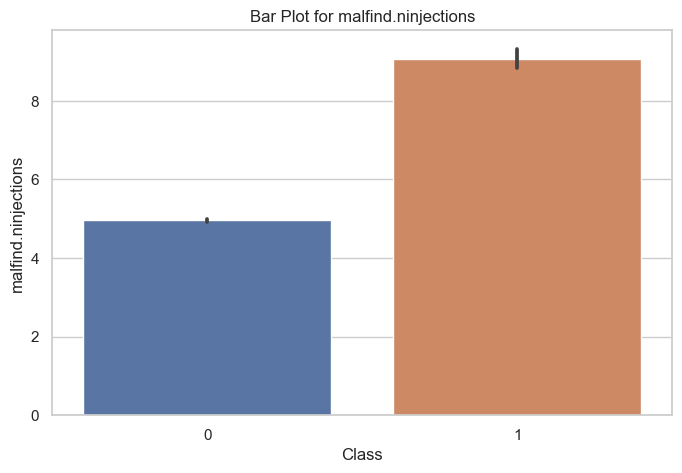

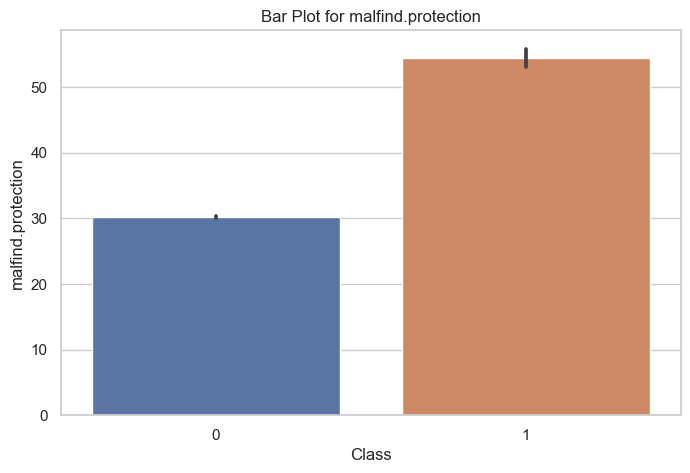

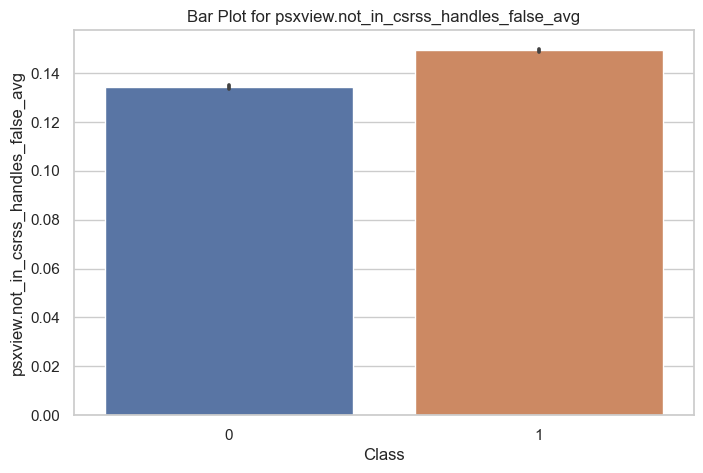

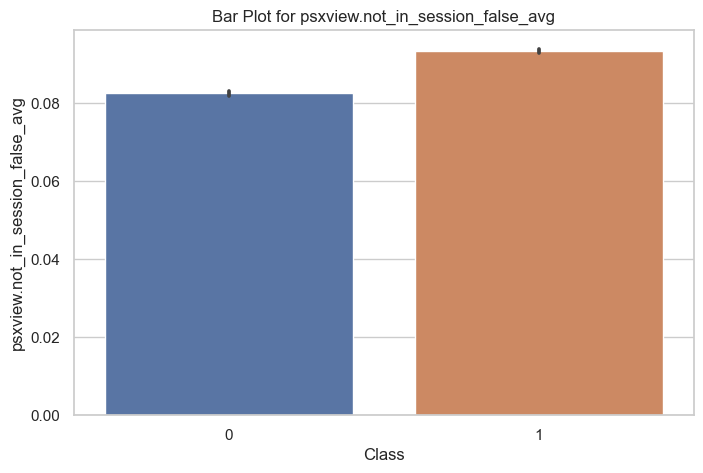

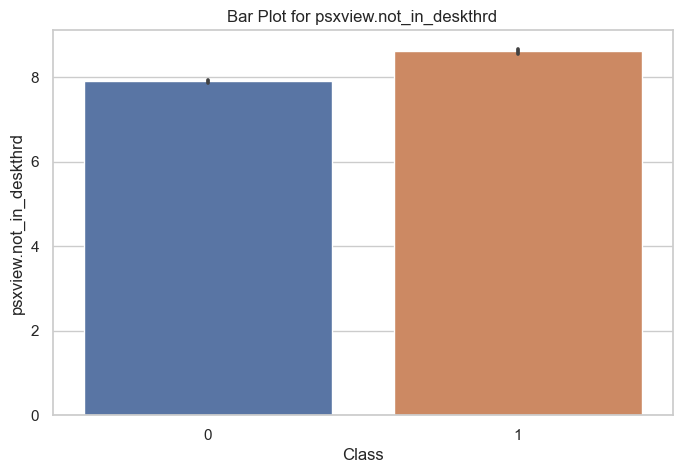

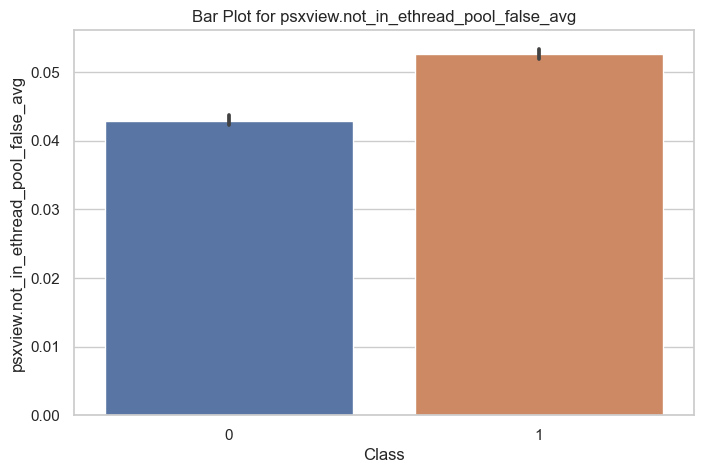

In [70]:
sns.set(style="whitegrid")

# Create bar plots for top 10 features with highest correlation 
for column in barplot_data.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Class', y=column, data=barplot_data)
    plt.title(f'Bar Plot for {column}')
    plt.show()

In [ ]:
## for above. 
## barplot takes the features and compares it to the table. 
## uses the mean of the data as comparison 
## if bar is taller, means that the feature with higher mean values is more common in that class instance. 
## will provide more context in research report. 


In [ ]:
## Top 10 features based on feature importance analysis 
## feature importance analysis done with random forest classifier. 
## 

In [73]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [75]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [76]:
print(Xtrain)

[[42.         17.         10.82236129 ... 87.          0.
   8.        ]
 [32.         13.         12.375      ... 88.          0.
   8.        ]
 [43.         17.          9.39534884 ... 87.          0.
   8.        ]
 ...
 [35.         14.         10.25714286 ... 87.          0.
   8.        ]
 [40.         12.         13.69128913 ... 88.          0.
   8.        ]
 [46.         16.         11.41329664 ... 87.          0.
   8.        ]]


In [77]:
print(Xtest)

[[40.         16.          9.825      ... 87.          0.
   8.        ]
 [39.         15.          9.92307692 ... 86.          0.
   8.        ]
 [45.         17.         12.36072166 ... 87.          0.
   8.        ]
 ...
 [22.          8.         14.54545455 ... 88.          0.
   8.        ]
 [40.         13.         12.8412493  ... 88.          0.
   8.        ]
 [42.         16.         10.11904762 ... 86.          0.
   8.        ]]


In [78]:
print(y_train)

[0 1 1 ... 1 0 0]


In [79]:
print(y_test)

[1 1 0 ... 1 0 1]


In [83]:
RF_classifier_FI = RandomForestClassifier(n_estimators = 100, random_state =42)
RF_classifier_FI.fit(Xtrain, y_train)

RandomForestClassifier(random_state=42)

In [84]:
important_features = RF_classifier_FI.feature_importances_

In [86]:
important_features.sort()

In [95]:
for feature, importance in zip(ds.columns, important_features):
    print(f"{feature}: {importance}")

pslist.nproc: 0.0
pslist.nppid: 0.0
pslist.avg_threads: 0.0
pslist.avg_handlers: 0.0
dlllist.ndlls: 0.0
dlllist.avg_dlls_per_proc: 1.2680254879398603e-05
handles.nhandles: 1.5255579617234475e-05
handles.avg_handles_per_proc: 2.63039068053345e-05
handles.nfile: 4.318494747492718e-05
handles.nevent: 4.966744181226939e-05
handles.ndesktop: 7.318208801200756e-05
handles.nkey: 8.785371833365348e-05
handles.nthread: 9.01667682238121e-05
handles.ndirectory: 0.00011331712903001248
handles.nsemaphore: 0.00016529543176342718
handles.ntimer: 0.0001724717960751373
handles.nsection: 0.00018603716373658818
handles.nmutant: 0.0002236151581085751
ldrmodules.not_in_load: 0.0002508032580539027
ldrmodules.not_in_init: 0.000339423003275677
ldrmodules.not_in_mem: 0.0004016473221689649
ldrmodules.not_in_load_avg: 0.0004186941839628476
ldrmodules.not_in_init_avg: 0.00046945002407231115
ldrmodules.not_in_mem_avg: 0.00047478539953938533
malfind.ninjections: 0.0005190465407292427
malfind.commitCharge: 0.0006033

In [ ]:
## TOP 10 Features based on Feature Importance 

# #modules.nmodules: 0.03847470087393427
# svcscan.nservices: 0.04759972536141228
# svcscan.kernel_drivers: 0.057511422683792175
# svcscan.fs_drivers: 0.06524944104842352
# svcscan.process_services: 0.06794900979129496
# svcscan.shared_process_services: 0.06972039868225671
# svcscan.nactive: 0.09560979246110282
# callbacks.ncallbacks: 0.0991482724829059
# callbacks.nanonymous: 0.09943123077982925
# callbacks.ngeneric: 0.1624051372603131

In [89]:
## barplots of these features. 
barplot_feature_importance_features = pd.DataFrame()

In [96]:
barplot_feature_importance_features = ds[['callbacks.ngeneric', 'callbacks.nanonymous', 'callbacks.ncallbacks', 'svcscan.nactive',
                                         'svcscan.shared_process_services', 'svcscan.fs_drivers', 'svcscan.kernel_drivers', 'svcscan.nservices',
                                         'modules.nmodules', 'Class']]

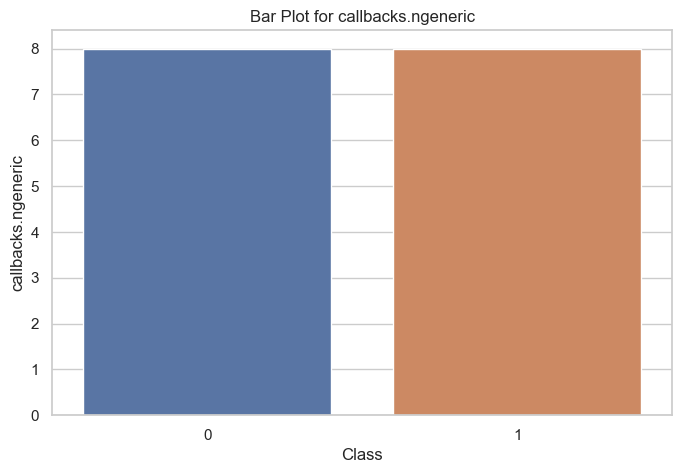

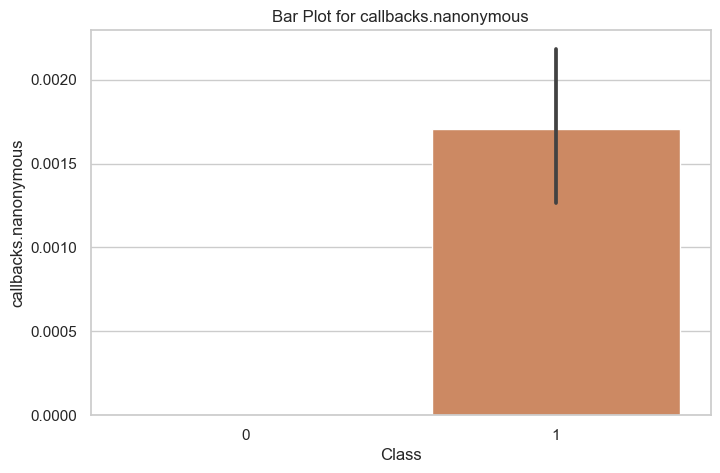

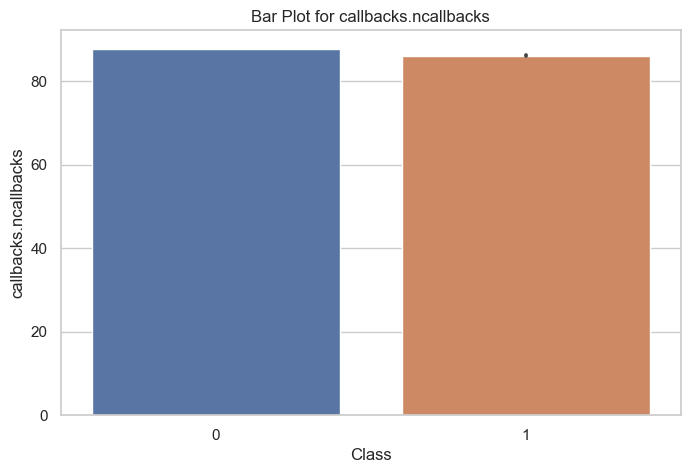

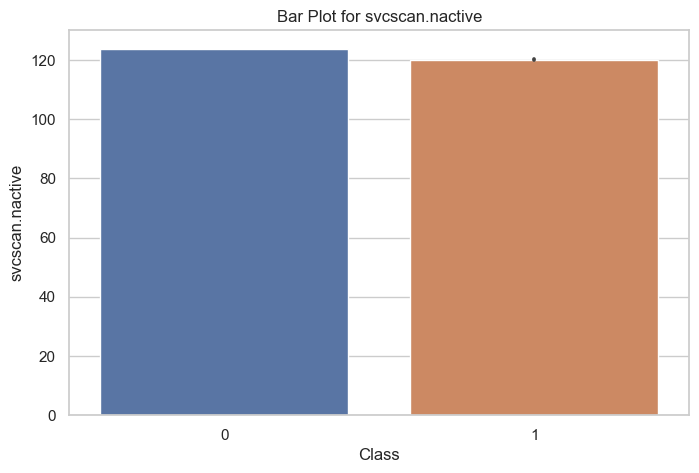

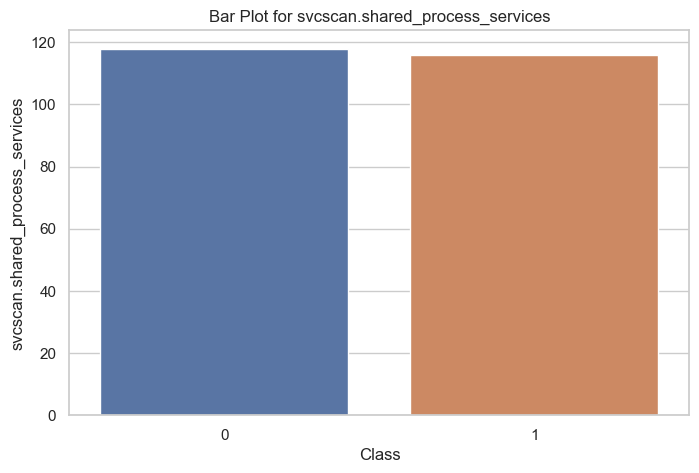

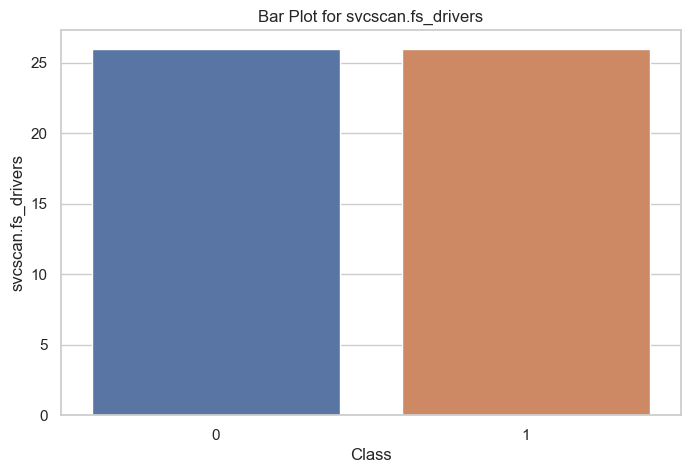

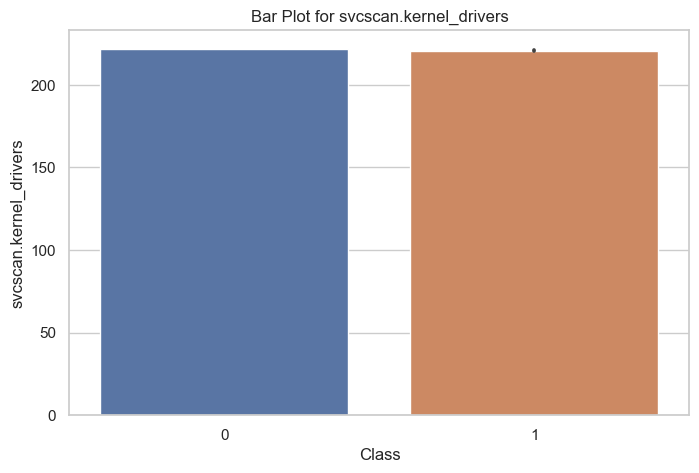

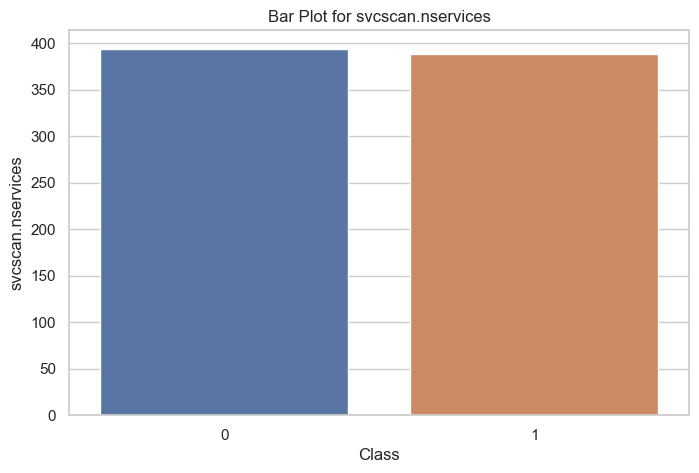

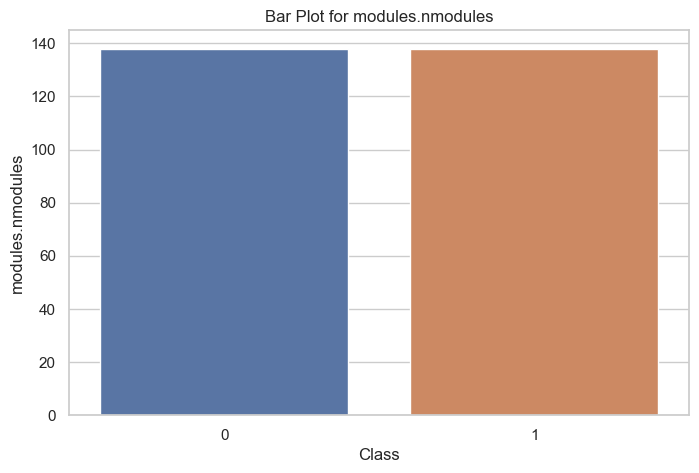

In [97]:
sns.set(style="whitegrid")

# Create bar plots for top 10 features based on feature importance
for column in barplot_feature_importance_features.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Class', y=column, data=barplot_feature_importance_features)
    plt.title(f'Bar Plot for {column}')
    plt.show()